# Notes made while I was reading opencv tutorial about [core operations](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_table_of_contents_core/py_table_of_contents_core.html#py-table-of-content-core)

In [1]:
%matplotlib inline
import cv2

from matplotlib import pyplot as plt
import numpy as np
import time as t

print(cv2.__version__)

3.2.0


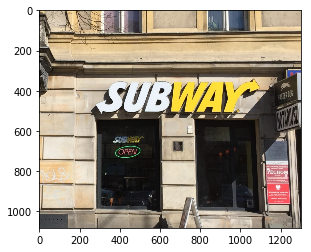

In [2]:
img = cv2.imread('subway_2.png', 3)
def custom_convert(image):    
    img = np.zeros_like(image)
    img[:,:,0] = image[:,:,2]
    img[:,:,1] = image[:,:,1]
    img[:,:,2] = image[:,:,0]
    return img

def show_image(cv_image):
    rows, cols, *channels = cv_image.shape
    channels = channels and channels[0]
    image = cv_image

    if channels == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #img2 = custom_convert(img)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

show_image(img)

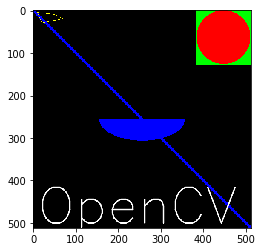

In [3]:
img = np.zeros((512,512,3), np.uint8)

cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.rectangle(img,(384,0),(510,128),(0,255,0),-3)
cv2.circle(img,(447,63), 63, (0,0,255), -1)
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

show_image(img)

In [4]:
# Get blue pixel
img[100, 102, 0] == img.item(100,102,0)

# Set red pixel
img.itemset((10,10,2),101)

In [5]:
# Shape of image
print(img.shape)

# Total number of pixels is accessed by img.size:
print(img.size)

# Image datatype is obtained by img.dtype:
print(img.dtype)

(512, 512, 3)
786432
uint8


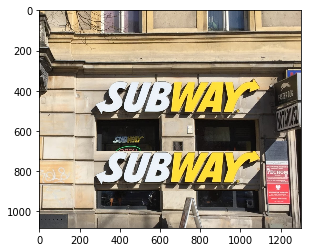

In [6]:
# ROI
img = cv2.imread('subway_2.png', 3)
logo = img[350:550, 275:1100]
img[700:900, 275:1100] = logo
show_image(img)

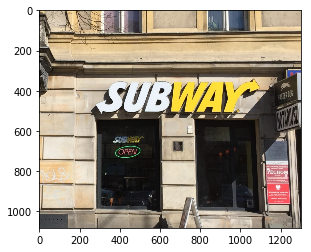

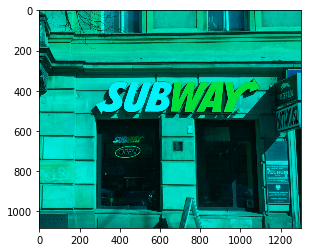

In [7]:
# Split channels
img = cv2.imread('subway_2.png', 3)

b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))
show_image(img)

b = img[:,:,0]

img[:,:,2] = 0
show_image(img)

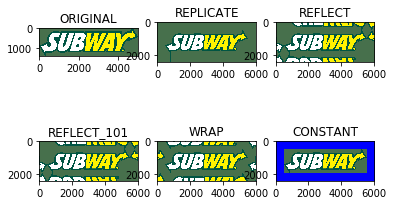

In [8]:
# Borders

BLUE = [0,0,255]

img1 = cv2.imread('subway_logo.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

replicate = cv2.copyMakeBorder(img1,500,500,500,500,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,500,500,500,500,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,500,500,500,500,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,500,500,500,500,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,500,500,500,500,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

In [9]:
x = np.uint8([250])
y = np.uint8([10])

cv2.add(x,y) # 250+10 = 260 => [[255]]
x+y          # 250+10 = 260 % 256 => [4]

array([4], dtype=uint8)

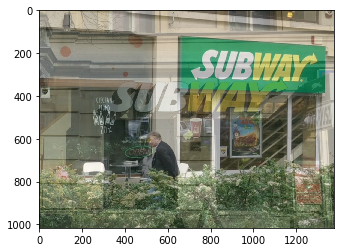

In [10]:
# Blend images
img1 = cv2.imread('subway_1.png')
img2 = cv2.imread('subway_2.png')
img2 = cv2.resize(img2, img1.shape[:2][::-1]) 

dst = cv2.addWeighted(img1,0.70,img2,0.3,0)

show_image(dst)

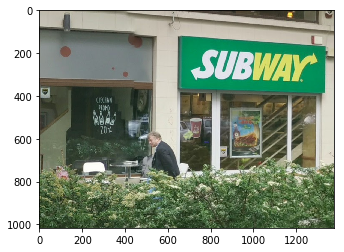

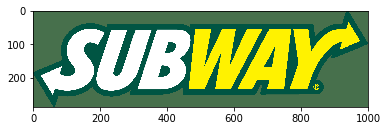

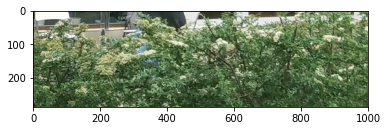

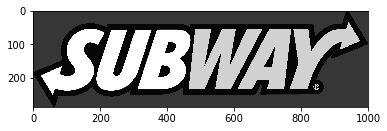

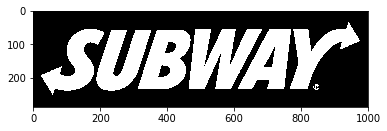

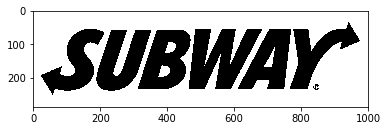

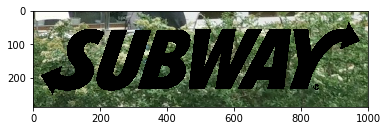

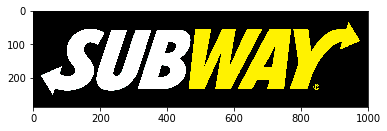

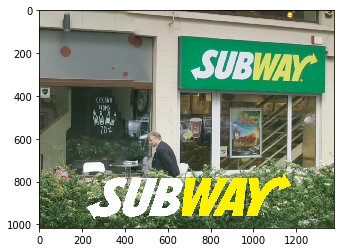

In [11]:
# Apply logo on picture

picture = cv2.imread('subway_1.png')

logo = cv2.imread('subway_logo.png')
shape = tuple([int(0.2 * d) for d in logo.shape[:2][::-1]])
logo = cv2.resize(logo, shape) 

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = logo.shape
logo_start_rows = 725
logo_start_cols = 200

roi = picture[logo_start_rows:(logo_start_rows + rows), logo_start_cols:(logo_start_cols + cols)]
show_image(picture)
show_image(logo)
show_image(roi)

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
show_image(img2gray)

ret, mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
show_image(mask)
show_image(mask_inv)

# Now black-out the area of logo in ROI
masked_roi = cv2.bitwise_and(roi, roi, mask = mask_inv)
show_image(masked_roi)

# Take only region of logo from logo image.
masked_logo = cv2.bitwise_and(logo, logo, mask = mask)
show_image(masked_logo)

# Put logo in ROI and modify the main image
dst = cv2.add(masked_roi, masked_logo)
picture[logo_start_rows:(logo_start_rows + rows), logo_start_cols:(logo_start_cols + cols)] = dst
show_image(picture)